In [1]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
project_id='icu-data-260103'
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id
client = bigquery.Client(location="US")

In [3]:
query = """
    SELECT *
    FROM `icu-data-260103.mimiciii_glucose.glucose_insulin_finger_features`
    WHERE dbsource = 'metavision'
"""

query_job = client.query(
    query,
    # Location must match that of the dataset(s) referenced in the query.
    location="US",
)  # API request - starts the query

df = query_job.to_dataframe()
df.columns = df.columns.str.lower()
print(df.shape)

(313365, 105)


In [4]:
df.sort_values(by=['icustay_id','timer'],inplace=True)
df.reset_index(drop=True,inplace=True)

In [5]:
for p in df.columns:
    print(p)

subject_id
hadm_id
icustay_id
icu_admissiontime
icu_dischargetime
timer
timer_dt
glc
glc_dt
msk
input_short_injection
input_short_push
input_intermediate
input_long
starttime
endtime
input_hrs
infxstop
demo_admission_age
demo_gender
demo_ethnicity_grouped
demo_diabetes_uncomplicated
demo_diabetes_complicated
demo_weight_first
demo_height_first
elix_congestive_heart_failure
elix_cardiac_arrhythmias
elix_valvular_disease
elix_pulmonary_circulation
elix_peripheral_vascular
elix_hypertension
elix_paralysis
elix_other_neurological
elix_chronic_pulmonary
elix_hypothyroidism
elix_renal_failure
elix_liver_disease
elix_peptic_ulcer
elix_aids
elix_lymphoma
elix_metastatic_cancer
elix_solid_tumor
elix_rheumatoid_arthritis
elix_coagulopathy
elix_obesity
elix_weight_loss
elix_fluid_electrolyte
elix_blood_loss_anemia
elix_deficiency_anemias
elix_alcohol_abuse
elix_drug_abuse
elix_psychoses
elix_depression
ventilated
med_dopamine_rate
med_dobutamine_rate
med_milirinone_rate
med_phenylephrine_rate
med

In [6]:
df.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'icu_admissiontime',
       'icu_dischargetime', 'timer', 'timer_dt', 'glc', 'glc_dt', 'msk',
       ...
       'fibre_enteral', 'calorie_enteral', 'dextrose_fluid', 'tpn',
       'tpn_lipids', 'dextrose_tpn', 'lipids_tpn', 'amino_acids_tpn',
       'lipids_10_20', 'dbsource'],
      dtype='object', length=105)

In [7]:
df.head()

,subject_id,hadm_id,icustay_id,icu_admissiontime,icu_dischargetime,timer,timer_dt,glc,glc_dt,msk,...,fibre_enteral,calorie_enteral,dextrose_fluid,tpn,tpn_lipids,dextrose_tpn,lipids_tpn,amino_acids_tpn,lipids_10_20,dbsource
0,55973,152234,200001,2181-11-25 19:06:12+00:00,2181-11-28 20:59:25+00:00,2181-11-25 22:00:00+00:00,2181-11-26 15:54:00+00:00,118.0,72.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,metavision
1,55973,152234,200001,2181-11-25 19:06:12+00:00,2181-11-28 20:59:25+00:00,2181-11-26 15:54:00+00:00,2181-11-26 22:00:00+00:00,72.0,135.0,0,...,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,metavision
2,55973,152234,200001,2181-11-25 19:06:12+00:00,2181-11-28 20:59:25+00:00,2181-11-26 22:00:00+00:00,2181-11-27 08:00:00+00:00,135.0,106.0,0,...,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,metavision
3,55973,152234,200001,2181-11-25 19:06:12+00:00,2181-11-28 20:59:25+00:00,2181-11-27 08:00:00+00:00,2181-11-27 16:00:00+00:00,106.0,125.0,0,...,NaN,NaN,10.166667,NaN,NaN,NaN,NaN,NaN,NaN,metavision
4,55973,152234,200001,2181-11-25 19:06:12+00:00,2181-11-28 20:59:25+00:00,2181-11-27 16:00:00+00:00,2181-11-27 22:00:00+00:00,125.0,101.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,metavision


In [8]:
## table 1 and other descriptive information

In [9]:
print("number of ICU stays:",len(df.icustay_id.unique()))
print("number of hospital stays:",len(df.hadm_id.unique()))
print("number of patients:",len(df.subject_id.unique()))

number of ICU stays: 16504
number of hospital stays: 15521
number of patients: 12979


In [10]:
df.groupby('icustay_id').demo_admission_age.min().median()

66.0

In [11]:
print("diabetes (uncomplicated):",df.groupby('hadm_id').demo_diabetes_uncomplicated.max().sum())
print("diabetes (complicated):",df.groupby('hadm_id').demo_diabetes_complicated.max().sum())

diabetes (uncomplicated): 4228
diabetes (complicated): 1592.0


In [12]:
print("diabetes (uncomplicated):",df.groupby('subject_id').demo_diabetes_uncomplicated.max().sum())
print("diabetes (complicated):",df.groupby('subject_id').demo_diabetes_complicated.max().sum())

diabetes (uncomplicated): 3569
diabetes (complicated): 1203.0


In [13]:
## data for analysis

In [14]:
df['timer'] = round((df.timer - df.icu_admissiontime).astype('timedelta64[m]') / 60.,ndigits=2)
df['timer_dt'] = round((df.timer_dt - df.icu_admissiontime).astype('timedelta64[m]') / 60.,ndigits=2)
df['starttime'] = round((df.starttime - df.icu_admissiontime).astype('timedelta64[m]') / 60.,ndigits=2)
df['endtime'] = round((df.endtime - df.icu_admissiontime).astype('timedelta64[m]') / 60.,ndigits=2)
df['icu_dischargetime'] = round((df.icu_dischargetime - df.icu_admissiontime).astype('timedelta64[m]') / 60.,ndigits=2)
df['icu_admissiontime'] = round((df.icu_admissiontime - df.icu_admissiontime).astype('timedelta64[m]') / 60.,ndigits=2)

In [15]:
df.loc[np.abs(df.timer_dt - df.timer) == 0,'msk'] = 1

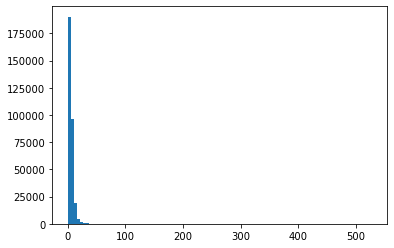

In [16]:
plt.hist(df.timer_dt - df.timer,bins=100)
plt.show()

In [17]:
df.loc[np.abs(df.timer_dt - df.timer) > 6,:]

,subject_id,hadm_id,icustay_id,icu_admissiontime,icu_dischargetime,timer,timer_dt,glc,glc_dt,msk,...,fibre_enteral,calorie_enteral,dextrose_fluid,tpn,tpn_lipids,dextrose_tpn,lipids_tpn,amino_acids_tpn,lipids_10_20,dbsource
0,55973,152234,200001,0.0,73.88,2.88,20.78,118.0,72.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,metavision
1,55973,152234,200001,0.0,73.88,20.78,26.88,72.0,135.0,0,...,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,metavision
2,55973,152234,200001,0.0,73.88,26.88,36.88,135.0,106.0,0,...,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,metavision
3,55973,152234,200001,0.0,73.88,36.88,44.88,106.0,125.0,0,...,NaN,NaN,10.166667,NaN,NaN,NaN,NaN,NaN,NaN,metavision
5,55973,152234,200001,0.0,73.88,50.88,62.88,101.0,102.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,metavision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313328,58128,108958,299956,0.0,654.45,640.05,646.35,208.0,165.0,0,...,NaN,69.999997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,metavision
313357,42728,142693,299979,0.0,39.97,21.72,31.72,NaN,153.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,metavision
313358,42728,142693,299979,0.0,39.97,31.72,38.22,153.0,170.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,metavision
313360,69587,158288,299998,0.0,46.60,10.88,17.72,196.0,235.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,metavision


In [18]:
### Insulin
# input_short_injection', 'input_short_push', 'input_intermediate',
#        'input_long', 'starttime', 'endtime', 'input_hrs', 'infxstop

In [19]:
df.loc[:,['input_short_injection', 'input_short_push', 'input_intermediate','input_long','input_hrs']] = df.loc[:,['input_short_injection', 'input_short_push', 'input_intermediate','input_long','input_hrs']].fillna(0)

In [20]:
### Food

In [21]:
df.loc[:,['amount_enteral',
'cho_enteral',
'dextrose_enteral',
'fat_enteral',
'protein_enteral',
'fibre_enteral',
'calorie_enteral',
'dextrose_fluid',
'tpn',
'tpn_lipids',
'dextrose_tpn',
'lipids_tpn',
'amino_acids_tpn',
'lipids_10_20']] = df.loc[:,['amount_enteral',
'cho_enteral',
'dextrose_enteral',
'fat_enteral',
'protein_enteral',
'fibre_enteral',
'calorie_enteral',
'dextrose_fluid',
'tpn',
'tpn_lipids',
'dextrose_tpn',
'lipids_tpn',
'amino_acids_tpn',
'lipids_10_20']].fillna(0)

In [22]:
### Demographic

In [23]:
df = pd.get_dummies(df,columns=['demo_gender','demo_ethnicity_grouped'],prefix=['demo_gender','demo_ethnicity_grouped'])

In [24]:
df.loc[df.demo_admission_age > 100,'demo_admission_age'] = 90

In [25]:
## Vitals

In [26]:
df.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'icu_admissiontime',
       'icu_dischargetime', 'timer', 'timer_dt', 'glc', 'glc_dt', 'msk',
       ...
       'dbsource', 'demo_gender_F', 'demo_gender_M',
       'demo_ethnicity_grouped_asian', 'demo_ethnicity_grouped_black',
       'demo_ethnicity_grouped_hispanic', 'demo_ethnicity_grouped_native',
       'demo_ethnicity_grouped_other', 'demo_ethnicity_grouped_unknown',
       'demo_ethnicity_grouped_white'],
      dtype='object', length=112)

In [27]:
df.loc[:,['vital_heartrate', 'vital_sysbp',
       'vital_diasbp', 'vital_meanbp', 'vital_resprate', 'vital_tempc',
       'vital_spo2']] = df.groupby('icustay_id')[['vital_heartrate', 'vital_sysbp',
       'vital_diasbp', 'vital_meanbp', 'vital_resprate', 'vital_tempc',
       'vital_spo2']].fillna(method='ffill')

In [28]:
## Labs

In [29]:
df.loc[:,['lab_aniongap', 'lab_albumin', 'lab_bands',
       'lab_bicarbonate', 'lab_bilirubin', 'lab_creatinine', 'lab_chloride',
       'lab_hematocrit', 'lab_hemoglobin', 'lab_lactate', 'lab_platelet',
       'lab_potassium', 'lab_ptt', 'lab_inr', 'lab_pt', 'lab_sodium',
       'lab_bun', 'lab_wbc']] = df.groupby('icustay_id')[['lab_aniongap', 'lab_albumin', 'lab_bands',
       'lab_bicarbonate', 'lab_bilirubin', 'lab_creatinine', 'lab_chloride',
       'lab_hematocrit', 'lab_hemoglobin', 'lab_lactate', 'lab_platelet',
       'lab_potassium', 'lab_ptt', 'lab_inr', 'lab_pt', 'lab_sodium',
       'lab_bun', 'lab_wbc']].fillna(method='ffill')

In [30]:
## MEDS

In [31]:
df.loc[:,['med_dopamine_rate', 'med_dobutamine_rate',
       'med_milirinone_rate', 'med_phenylephrine_rate', 'med_epinephrine_rate',
       'med_norepinephrine_rate']] = df.loc[:,['med_dopamine_rate', 'med_dobutamine_rate',
       'med_milirinone_rate', 'med_phenylephrine_rate', 'med_epinephrine_rate',
       'med_norepinephrine_rate']].fillna(value=0.)

In [32]:
## FLuids

In [33]:
df.loc[:,['fluid_rate_all', 'fluid_rate_in',
       'fluid_rate_out']] = df.loc[:,['fluid_rate_all', 'fluid_rate_in',
       'fluid_rate_out']].fillna(value=0.)

In [34]:
## dialysis

In [35]:
df.loc[:,['dialysis_present', 'dialysis_active']] = df.loc[:,['dialysis_present', 'dialysis_active']].fillna(value=0.)

In [36]:
## ventilated

In [37]:
df.loc[:,['ventilated']] = df.loc[:,['ventilated']].fillna(value=0.)

In [38]:
## glucose

In [39]:
df['msk0'] = 1*df['glc'].isnull()

In [40]:
df['glc'] = df.groupby('icustay_id').glc.fillna(method='ffill')

In [41]:
print(df.loc[df.glc.isnull(),'msk'].shape)
df.loc[df.glc.isnull(),'msk'] = 1.0

(1514,)


In [42]:
df.loc[df.glc.isnull(),'glc'] = df.loc[df.glc.isnull(),'glc_dt']

In [43]:
print(df.shape)

(313365, 113)


In [44]:
df.head()

,subject_id,hadm_id,icustay_id,icu_admissiontime,icu_dischargetime,timer,timer_dt,glc,glc_dt,msk,...,demo_gender_F,demo_gender_M,demo_ethnicity_grouped_asian,demo_ethnicity_grouped_black,demo_ethnicity_grouped_hispanic,demo_ethnicity_grouped_native,demo_ethnicity_grouped_other,demo_ethnicity_grouped_unknown,demo_ethnicity_grouped_white,msk0
0,55973,152234,200001,0.0,73.88,2.88,20.78,118.0,72.0,0,...,1,0,1,0,0,0,0,0,0,0
1,55973,152234,200001,0.0,73.88,20.78,26.88,72.0,135.0,0,...,1,0,1,0,0,0,0,0,0,0
2,55973,152234,200001,0.0,73.88,26.88,36.88,135.0,106.0,0,...,1,0,1,0,0,0,0,0,0,0
3,55973,152234,200001,0.0,73.88,36.88,44.88,106.0,125.0,0,...,1,0,1,0,0,0,0,0,0,0
4,55973,152234,200001,0.0,73.88,44.88,50.88,125.0,101.0,0,...,1,0,1,0,0,0,0,0,0,0


In [45]:
# these are first row insulin but no glucose rows
df = df.loc[~(df.glc.isnull() & df.glc_dt.isnull()),:].copy(deep=True)
print(df.shape)

(312967, 113)


In [46]:
## data explore

In [47]:
np.sqrt(np.mean((df.glc - df.glc_dt)**2))

43.412108232699865

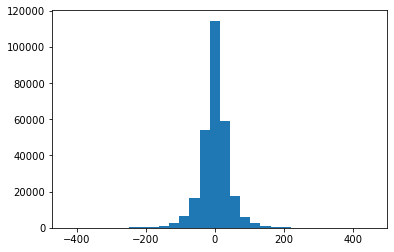

In [48]:
plt.hist(df.glc - df.glc_dt,bins=30)
plt.show()

In [49]:
df['change_glc'] = df.glc - df.glc_dt

In [50]:
df.loc[np.abs(df.change_glc) > 100]

,subject_id,hadm_id,icustay_id,icu_admissiontime,icu_dischargetime,timer,timer_dt,glc,glc_dt,msk,...,demo_gender_M,demo_ethnicity_grouped_asian,demo_ethnicity_grouped_black,demo_ethnicity_grouped_hispanic,demo_ethnicity_grouped_native,demo_ethnicity_grouped_other,demo_ethnicity_grouped_unknown,demo_ethnicity_grouped_white,msk0,change_glc
18,41710,181955,200028,0.0,69.68,13.28,19.40,258.0,368.0,0,...,1,0,0,0,0,0,0,1,1,-110.0
46,56369,198650,200033,0.0,333.05,100.55,107.05,182.0,32.0,0,...,1,0,0,0,0,0,0,1,0,150.0
47,56369,198650,200033,0.0,333.05,107.05,107.55,32.0,326.0,0,...,1,0,0,0,0,0,0,1,0,-294.0
48,56369,198650,200033,0.0,333.05,107.55,107.87,326.0,224.0,0,...,1,0,0,0,0,0,0,1,0,102.0
97,73241,149216,200049,0.0,34.08,7.05,13.05,145.0,297.0,0,...,1,0,0,0,0,0,0,1,0,-152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313173,93831,107720,299947,0.0,33.00,7.20,24.82,112.0,311.0,0,...,0,0,0,0,0,0,0,1,0,-199.0
313201,58128,108958,299956,0.0,654.45,4.57,10.30,185.0,288.0,0,...,1,0,0,0,0,0,0,1,0,-103.0
313207,58128,108958,299956,0.0,654.45,33.35,34.75,258.0,157.0,0,...,1,0,0,0,0,0,0,1,0,101.0
313258,58128,108958,299956,0.0,654.45,208.65,214.35,236.0,135.0,0,...,1,0,0,0,0,0,0,1,0,101.0


In [51]:
t1 = df.groupby('icustay_id')['timer_dt'].count()
t2 = df.groupby('icustay_id')['timer_dt'].max()
t1.name = 'count'
t2.name = 'max'

In [52]:
t3 = pd.merge(pd.DataFrame(t1),pd.DataFrame(t2),left_index=True, right_index=True)

In [53]:
t3.rename(columns={'count':'cnt','max':'mx'},inplace=True)

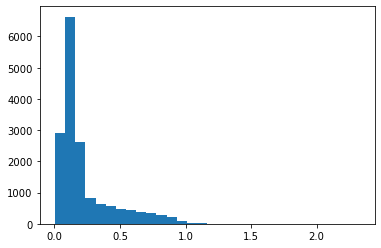

In [54]:
plt.hist(t3['cnt']/t3['mx'],bins=30)
plt.show()

In [55]:
t3['rate'] = t3['cnt']/t3['mx']

In [56]:
keep_ids = t3.loc[t3.rate < 0.2].index

In [57]:
keep_ids = list(keep_ids)

In [58]:
## save

In [59]:
df = df.loc[(df.timer > -4) & (df.timer < 24*5),:].copy()

(array([   784.,  32357., 101061.,  49609.,  17071.,   7704.,   3693.,
          2014.,   1207.,    802.]),
 array([  1. ,  50.8, 100.6, 150.4, 200.2, 250. , 299.8, 349.6, 399.4,
        449.2, 499. ]),
 <BarContainer object of 10 artists>)

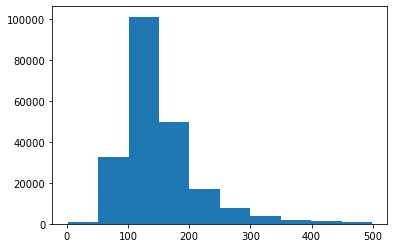

In [60]:
plt.hist(df.glc)

In [61]:
df = df.loc[df.icustay_id.isin(keep_ids)].copy()
df.sort_values(by=['icustay_id','timer'],inplace=True)
df.reset_index(drop=True,inplace=True)
#df.to_csv('../../data/analysis.csv',index=False)

In [65]:
df.shape

(85836, 114)

In [67]:
len(df.icustay_id.unique())

11436

In [62]:
df.head()

,subject_id,hadm_id,icustay_id,icu_admissiontime,icu_dischargetime,timer,timer_dt,glc,glc_dt,msk,...,demo_gender_M,demo_ethnicity_grouped_asian,demo_ethnicity_grouped_black,demo_ethnicity_grouped_hispanic,demo_ethnicity_grouped_native,demo_ethnicity_grouped_other,demo_ethnicity_grouped_unknown,demo_ethnicity_grouped_white,msk0,change_glc
0,55973,152234,200001,0.0,73.88,2.88,20.78,118.0,72.0,0,...,0,1,0,0,0,0,0,0,0,46.0
1,55973,152234,200001,0.0,73.88,20.78,26.88,72.0,135.0,0,...,0,1,0,0,0,0,0,0,0,-63.0
2,55973,152234,200001,0.0,73.88,26.88,36.88,135.0,106.0,0,...,0,1,0,0,0,0,0,0,0,29.0
3,55973,152234,200001,0.0,73.88,36.88,44.88,106.0,125.0,0,...,0,1,0,0,0,0,0,0,0,-19.0
4,55973,152234,200001,0.0,73.88,44.88,50.88,125.0,101.0,0,...,0,1,0,0,0,0,0,0,0,24.0


In [63]:
df.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'icu_admissiontime',
       'icu_dischargetime', 'timer', 'timer_dt', 'glc', 'glc_dt', 'msk',
       ...
       'demo_gender_M', 'demo_ethnicity_grouped_asian',
       'demo_ethnicity_grouped_black', 'demo_ethnicity_grouped_hispanic',
       'demo_ethnicity_grouped_native', 'demo_ethnicity_grouped_other',
       'demo_ethnicity_grouped_unknown', 'demo_ethnicity_grouped_white',
       'msk0', 'change_glc'],
      dtype='object', length=114)

In [72]:
np.sqrt(np.mean((df.glc - df.glc_dt)**2))

45.43210208989025

In [64]:
# t1 = df.groupby('icustay_id')['timer_dt'].count()
# t2 = df.groupby('icustay_id')['timer_dt'].max()
# t1.name = 'count'
# t2.name = 'max'
# pd.merge(t1,t2)